<a href="https://colab.research.google.com/github/hareeshmahant05/CodeBounty-Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Important Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

**Importing Dataset**

In [2]:
data=pd.read_csv('/content/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


**Prints information about the DataFrame. The information contains the number of columns, column labels, column data types**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73377 entries, 0 to 73376
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    73377 non-null  int64  
 1   V1      73377 non-null  float64
 2   V2      73377 non-null  float64
 3   V3      73377 non-null  float64
 4   V4      73377 non-null  float64
 5   V5      73377 non-null  float64
 6   V6      73377 non-null  float64
 7   V7      73377 non-null  float64
 8   V8      73377 non-null  float64
 9   V9      73377 non-null  float64
 10  V10     73377 non-null  float64
 11  V11     73377 non-null  float64
 12  V12     73377 non-null  float64
 13  V13     73377 non-null  float64
 14  V14     73377 non-null  float64
 15  V15     73377 non-null  float64
 16  V16     73377 non-null  float64
 17  V17     73377 non-null  float64
 18  V18     73377 non-null  float64
 19  V19     73377 non-null  float64
 20  V20     73377 non-null  float64
 21  V21     73377 non-null  float64
 22

**Identifying any NAN value in dataset**

In [4]:
data.isnull().sum(axis=0)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

**Check for duplicates**

In [5]:
duplicates = data[data.duplicated()]
print("Number of duplicates: " ,len (duplicates) )

Number of duplicates:  282


**Checking for outliers**

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,73377.000000,73377.000000,73377.000000,73377.000000,73377.000000,73377.000000,73377.000000,73377.000000,73377.000000,73377.000000,...,73377.000000,73377.000000,73377.000000,73377.000000,73377.000000,73376.000000,73376.000000,73376.000000,73376.000000,73376.000000
mean,35585.573872,-0.253191,-0.026959,0.678866,0.168021,-0.272388,0.098351,-0.113787,0.055719,0.009983,...,-0.028672,-0.106260,-0.038610,0.006354,0.135416,0.024027,0.002334,0.003027,97.319552,0.002426
std,14672.723434,1.880796,1.665003,1.408884,1.372497,1.387707,1.304997,1.252286,1.234504,1.155997,...,0.737871,0.637365,0.622186,0.596241,0.439999,0.498403,0.386990,0.325267,270.209620,0.049194
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,29408.000000,-1.012767,-0.594981,0.191359,-0.725068,-0.890076,-0.639160,-0.604468,-0.141902,-0.676331,...,-0.225578,-0.525467,-0.178807,-0.324765,-0.128400,-0.328183,-0.063013,-0.005802,7.680000,0.000000
50%,38645.000000,-0.246674,0.071742,0.767744,0.187161,-0.304873,-0.152364,-0.073795,0.067809,-0.075887,...,-0.059954,-0.080278,-0.050791,0.062493,0.173443,-0.074571,0.009396,0.022852,26.625000,0.000000
75%,46739.000000,1.153498,0.726269,1.400254,1.052199,0.265093,0.492396,0.420147,0.347037,0.655599,...,0.116148,0.308621,0.079952,0.403607,0.422133,0.303708,0.082495,0.075879,88.970000,0.000000
max,55107.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,19656.530000,1.000000


**Checking dtypes**

In [7]:
data.dtypes

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

**Show shape of data after removing duplicates**

In [8]:
data.shape

(73377, 31)

In [9]:
data.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,-0.010681,-0.086612,-0.049149,-0.032035,-0.058069,-0.007885,-0.001104,0.025948,-0.308084,...,0.011518,0.029578,0.000309,-0.007739,0.020811,-0.007025,-0.017549,-0.003820,0.058399,-0.016396
V1,-0.010681,1.000000,0.027437,0.267479,-0.081867,0.046856,0.086071,0.117801,-0.043638,-0.038887,...,-0.022761,-0.042669,-0.064371,-0.009898,0.186930,0.025710,-0.046277,0.115066,-0.252495,-0.171227
V2,-0.086612,0.027437,1.000000,-0.124403,0.065768,-0.070354,0.005928,-0.053734,0.055443,-0.013349,...,-0.020777,-0.027734,0.018253,-0.022655,-0.079290,-0.021646,0.026987,-0.018887,-0.560108,0.145650
V3,-0.049149,0.267479,-0.124403,1.000000,-0.113570,0.257907,-0.039012,0.255698,-0.199609,0.141355,...,0.022521,0.235818,0.055187,0.022936,-0.182115,0.049727,-0.091719,0.036535,-0.219704,-0.342543
V4,-0.032035,-0.081867,0.065768,-0.113570,1.000000,-0.022492,-0.047244,-0.053068,0.068159,0.029211,...,0.017355,0.022792,-0.017758,-0.000689,-0.004993,-0.012337,0.044669,-0.002027,0.094357,0.183907
V5,-0.058069,0.046856,-0.070354,0.257907,-0.022492,1.000000,0.046840,-0.007224,-0.064532,0.058912,...,-0.060134,-0.065638,0.014495,-0.016788,-0.017740,-0.038431,-0.039214,0.018615,-0.392704,-0.169681
V6,-0.007885,0.086071,0.005928,-0.039012,-0.047244,0.046840,1.000000,0.090060,-0.053418,0.044742,...,0.018532,0.035042,-0.010866,-0.000948,0.047877,0.009151,-0.015399,-0.026225,0.210267,-0.082537
V7,-0.001104,0.117801,-0.053734,0.255698,-0.053068,-0.007224,0.090060,1.000000,-0.068940,0.054809,...,0.022609,-0.039037,0.076794,-0.001539,-0.101689,-0.036930,-0.117486,-0.039471,0.380157,-0.275276
V8,0.025948,-0.043638,0.055443,-0.199609,0.068159,-0.064532,-0.053418,-0.068940,1.000000,-0.045011,...,0.047263,0.013095,-0.020821,0.007870,0.018234,0.005343,0.014744,0.038505,-0.094462,0.130875
V9,-0.308084,-0.038887,-0.013349,0.141355,0.029211,0.058912,0.044742,0.054809,-0.045011,1.000000,...,-0.006478,0.029227,-0.046214,0.011327,0.109533,0.107032,-0.020830,-0.011395,-0.024001,-0.135199


In [10]:
data.skew()

Time      -0.923116
V1        -4.124907
V2        -4.973496
V3        -6.054897
V4         0.394829
V5        -1.196405
V6         1.081522
V7        -1.554786
V8        -8.551955
V9         0.554223
V10        0.161432
V11        0.561864
V12       -2.377582
V13        0.139395
V14       -3.068279
V15       -0.581143
V16       -1.833442
V17       -6.142091
V18       -0.540599
V19       -0.080274
V20        3.784661
V21        2.242975
V22       -0.486928
V23       -4.530253
V24       -0.592107
V25       -0.654068
V26        0.683535
V27       -1.643776
V28       12.105195
Amount    15.569570
Class     20.229777
dtype: float64

**Returns the number of unique values for each column**

In [11]:
data.nunique()

Time      34689
V1        71795
V2        71795
V3        71795
V4        71795
V5        71795
V6        71795
V7        71795
V8        71795
V9        71795
V10       71795
V11       71795
V12       71795
V13       71795
V14       71795
V15       71795
V16       71795
V17       71795
V18       71795
V19       71795
V20       71795
V21       71795
V22       71795
V23       71795
V24       71795
V25       71795
V26       71794
V27       71794
V28       71794
Amount    16380
Class         2
dtype: int64

In [12]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

**Checking for the value counts**

In [13]:
data["Amount"].value_counts()

Amount
1.00      3091
1.98      1147
9.99      1102
0.89       968
15.00      814
          ... 
845.73       1
227.10       1
348.85       1
107.62       1
322.34       1
Name: count, Length: 16380, dtype: int64

**Describing the data**

In [14]:
print("Shape of the Data:", data.shape)
print("Description of the data:")
print(data.describe())

Shape of the Data: (73377, 31)
Description of the data:
               Time            V1            V2            V3            V4  \
count  73377.000000  73377.000000  73377.000000  73377.000000  73377.000000   
mean   35585.573872     -0.253191     -0.026959      0.678866      0.168021   
std    14672.723434      1.880796      1.665003      1.408884      1.372497   
min        0.000000    -56.407510    -72.715728    -33.680984     -5.172595   
25%    29408.000000     -1.012767     -0.594981      0.191359     -0.725068   
50%    38645.000000     -0.246674      0.071742      0.767744      0.187161   
75%    46739.000000      1.153498      0.726269      1.400254      1.052199   
max    55107.000000      1.960497     18.902453      4.226108     16.715537   

                 V5            V6            V7            V8            V9  \
count  73377.000000  73377.000000  73377.000000  73377.000000  73377.000000   
mean      -0.272388      0.098351     -0.113787      0.055719      0.00998

**Determine the number of fraud cases**

In [15]:
fraud=data[data['Class']==1]
valid=data[data['Class']==0]
OutlierFraction=len(fraud)/float(len(valid))
print("Number of fraud cases as compared to valid cases:", OutlierFraction)
print('Fraud Cases: {}'.format(len(fraud)))
print('Valid Cases: {}'.format(len(valid)))

Number of fraud cases as compared to valid cases: 0.002431760430612858
Fraud Cases: 178
Valid Cases: 73198


**Details of Fraudulent transaction**

In [16]:
print("Amount details of Fraudulent Transaction:")
fraud.Amount.describe()

Amount details of Fraudulent Transaction:


count     178.000000
mean       95.191461
std       218.660540
min         0.000000
25%         1.000000
50%         7.595000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

**Details of Valid Transaction**

In [17]:
print("Amount details of Valid Transaction:")
valid.Amount.describe()

Amount details of Valid Transaction:


count    73198.000000
mean        97.324727
std        270.324183
min          0.000000
25%          7.680000
50%         26.675000
75%         88.947500
max      19656.530000
Name: Amount, dtype: float64

**Correlation matrix for given dataset**

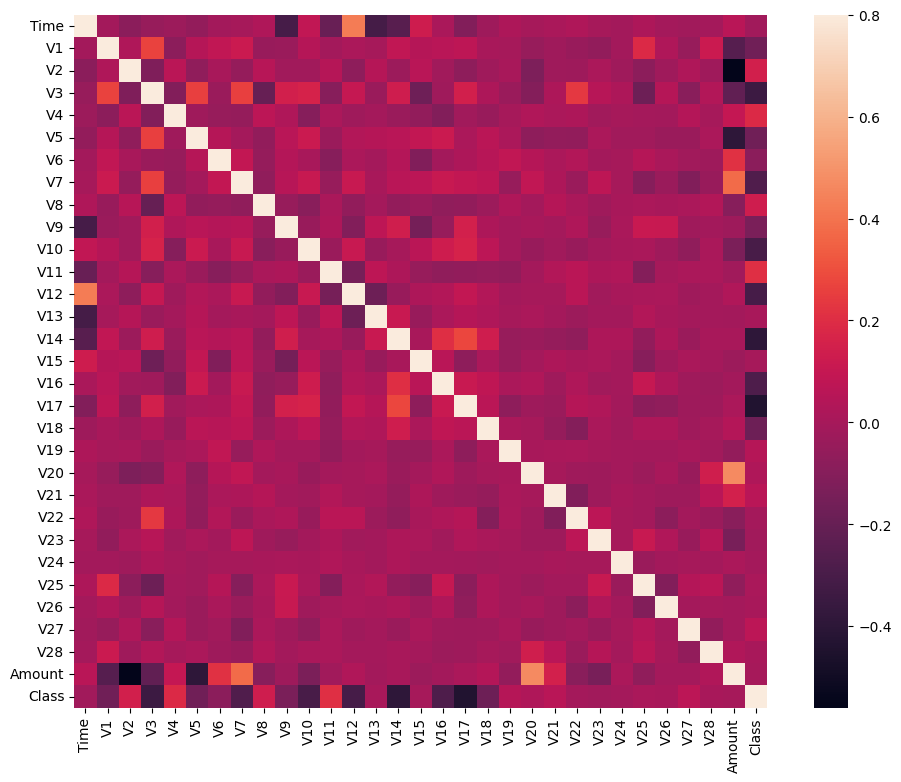

In [18]:
corrmat=data.corr()
fig=plt.figure(figsize=(12,9))
sns.heatmap(corrmat,vmax=0.8,square=True)
plt.show()

In [19]:
X=data.drop(['Class'],axis=1)
Y=data['Class']
print("Shape of X:", X.shape)
print("Shape of Y:" , Y.shape)

xData=X.values
yData=Y.values

Shape of X: (73377, 30)
Shape of Y: (73377,)


**Creating X and y labels using the dataset**

In [20]:
#Using Skicit-learn to split data into training and testing data

from sklearn.model_selection import train_test_split

xTrain,xTest,yTrain,yTest=train_test_split(xData,yData,test_size=0.2,random_state=42)

#Spliting the data into training and testing data
print("Shape of Training Data:",xTrain.shape)
print("Shape of Testing Data:",xTest.shape)

Shape of Training Data: (58701, 30)
Shape of Testing Data: (14676, 30)


**Building a Random Forest Classifier**

In [21]:
import pandas as pd

# Load the data into a Pandas DataFrame
data = pd.read_csv("/content/creditcard.csv")

# Drop rows with missing values in the target variable
data = data.dropna(subset=["Class"])

# Extract the features and target variables
X = data.drop(["Class"], axis=1)
y = data["Class"]

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)

RandomForestClassifier()

**Predicting on Test set using above trained models**

In [22]:
yPred=rfc.predict(xTest)

**Evaluating the Random Forest Classifier**

In [23]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random Forest classifier
The accuracy is 0.9993186154265468
The precision is 0.9615384615384616
The recall is 0.7352941176470589
The F1-Score is 0.8333333333333333
The Matthews correlation coefficient is0.840533301071103


In [24]:
data.drop(['Class'],axis=1, inplace = True)

In [25]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73371,55105,-3.861675,2.407060,-0.983850,-0.790425,-0.156880,4.358016,-2.624498,3.417116,1.102450,...,0.094564,-0.112890,-0.509753,0.010666,1.042407,0.803095,0.433399,-0.423778,0.073211,6.26
73372,55105,1.104021,-1.123835,1.008939,-0.460960,-1.502758,0.021138,-1.055043,0.095135,-0.175413,...,0.290500,0.405906,1.054006,-0.174455,0.155852,0.358077,-0.030114,0.048490,0.042121,119.00
73373,55105,1.182898,-0.283273,1.123494,0.066948,-1.283276,-0.900451,-0.441870,-0.150647,0.784691,...,0.040402,0.082278,0.491790,-0.025468,1.078368,0.258355,1.415871,-0.060454,0.014606,22.71
73374,55106,1.168124,-0.122507,1.251822,0.860341,-1.020137,-0.277310,-0.557856,0.023732,0.802378,...,-0.031082,-0.077921,-0.005984,0.014309,0.452036,0.281031,0.313100,0.020995,0.030389,16.35


In [26]:
Time=float(input("Enter value of 'Time': "))
v1=float(input("Enter value of 'v1': "))
v2=float(input("Enter value of 'v2': "))
v3=float(input("Enter value of 'v3': "))
v4=float(input("Enter value of 'v4': "))
v5=float(input("Enter value of 'v5': "))
v6=float(input("Enter value of 'v6': "))
v7=float(input("Enter value of 'v7': "))
v8=float(input("Enter value of 'v8': "))
v9=float(input("Enter value of 'v9': "))
v10=float(input("Enter value of 'v10': "))
v11=float(input("Enter value of 'v11': "))
v12=float(input("Enter value of 'v12': "))
v13=float(input("Enter value of 'v13': "))
v14=float(input("Enter value of 'v14': "))
v15=float(input("Enter value of 'v15': "))
v16=float(input("Enter value of 'v16': "))
v17=float(input("Enter value of 'v17': "))
v18=float(input("Enter value of 'v18': "))
v19=float(input("Enter value of 'v19': "))
v20=float(input("Enter value of 'v20': "))
v21=float(input("Enter value of 'v21': "))
v22=float(input("Enter value of 'v22': "))
v23=float(input("Enter value of 'v23': "))
v24=float(input("Enter value of 'v24': "))
v25=float(input("Enter value of 'v25': "))
v26=float(input("Enter value of 'v26': "))
v27=float(input("Enter value of 'v27': "))
v28=float(input("Enter value of 'v28': "))
Amount=float(input("Enter value of 'Amount': "))

Enter value of 'Time': 45678
Enter value of 'v1': 0.000234
Enter value of 'v2': 0.000087
Enter value of 'v3': -0.00034
Enter value of 'v4': -0.00234
Enter value of 'v5': 0.000345
Enter value of 'v6': 0.0034
Enter value of 'v7': -0.0000034
Enter value of 'v8': 0.0087
Enter value of 'v9': 0.000034
Enter value of 'v10': -0.0000234
Enter value of 'v11': 0.000876
Enter value of 'v12': 0.00096
Enter value of 'v13': 0.00008734
Enter value of 'v14': 0.0000873
Enter value of 'v15': 0.000564
Enter value of 'v16': -0.007654
Enter value of 'v17': 0.007654
Enter value of 'v18': -0.00965
Enter value of 'v19': 0.000234
Enter value of 'v20': -0.0098654
Enter value of 'v21': -0.00003675
Enter value of 'v22': 0.0000534
Enter value of 'v23': 0.0087654
Enter value of 'v24': -0.00765
Enter value of 'v25': -0.0000009876
Enter value of 'v26': 0.00000765
Enter value of 'v27': 0.000345
Enter value of 'v28': 0.0000876
Enter value of 'Amount': 76543456


In [27]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(xTrain, yTrain)

test_list = [Time, v1, v2, v3, v4, v5, v6, v7, v8, v9, v10,
             v11, v12, v13, v14, v15, v16, v17, v18, v19, v20,
             v21, v22, v23, v24, v25, v26, v27, v28, Amount]

test_df = pd.DataFrame(test_list)
test = test_df.transpose()

test_pred = model.predict(test)

if test_pred == 1:
    print("Fraudulent Transaction Detected.")
else:
    print("Non-Fraudulent Transaction.")

Non-Fraudulent Transaction.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
